# Part3: Exploratory Data Analysis (EDA) and Visualization
<span style="color:red;">**Note: Since the work is divided into scraping and subsequent manual processing, the project code is split into five files. This is the third code file.**</span>
 
## 1. Load Data
<span style="color:red;">**Note: Based on Data Cleaning 2.0, we manually removed some duplicates, corrected stock codes that failed to be scraped due to website issues, and used the Wind Excel plugin to add industry and financial data. Therefore, “Data Cleaning 2.1” is new data, not directly produced from the previous code.**</span>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

file_path = '中间数据/数据清理2.1.xlsx'
data = pd.read_excel(file_path)


## 2. Visualization: Industries with the Most Mentions of “Supply Chain Finance”
### 2.1 Calculation

In [3]:
# 计算出现前10多的 Wind一级行业 and Wind二级行业
top_10_primary_industries = data['Wind一级行业'].value_counts().head(10)
top_10_secondary_industries = data['Wind二级行业'].value_counts().head(10)


### 2.2 Visualization


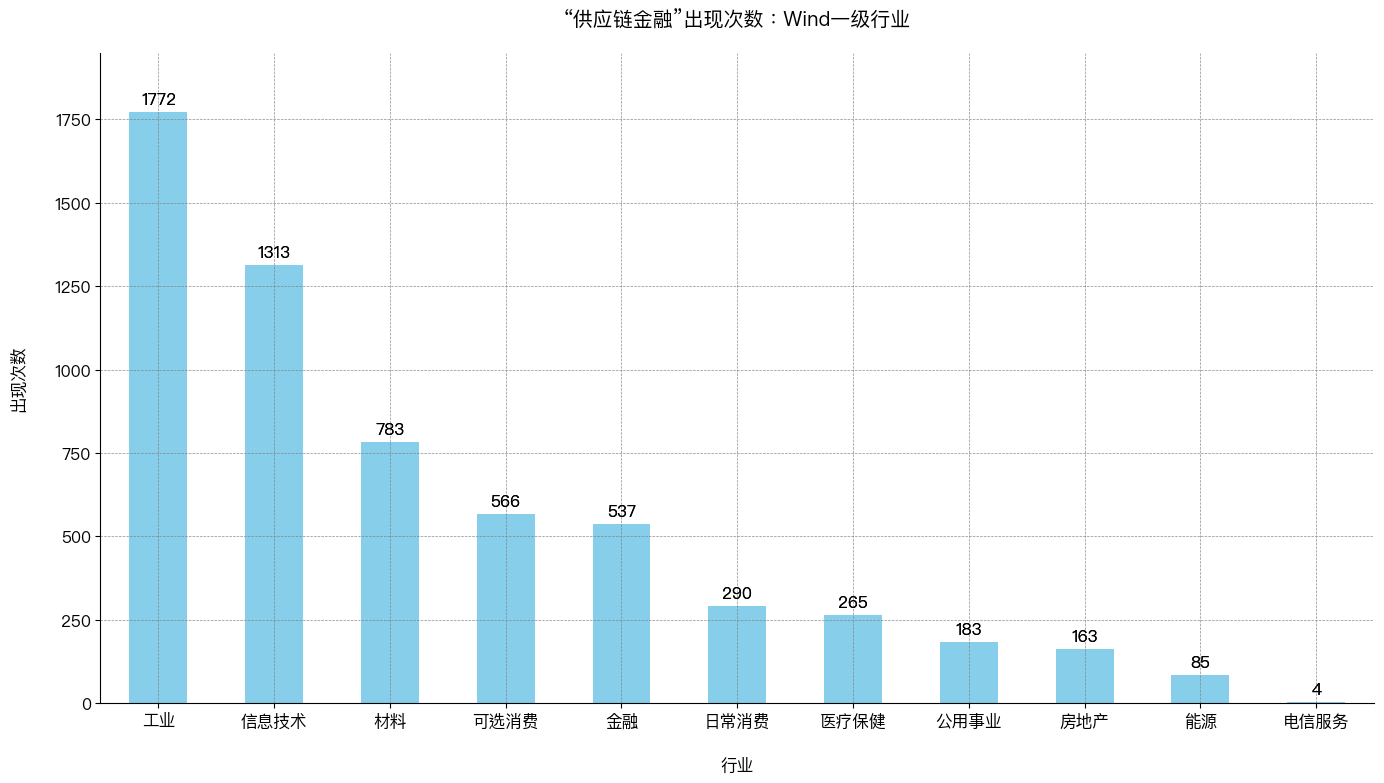

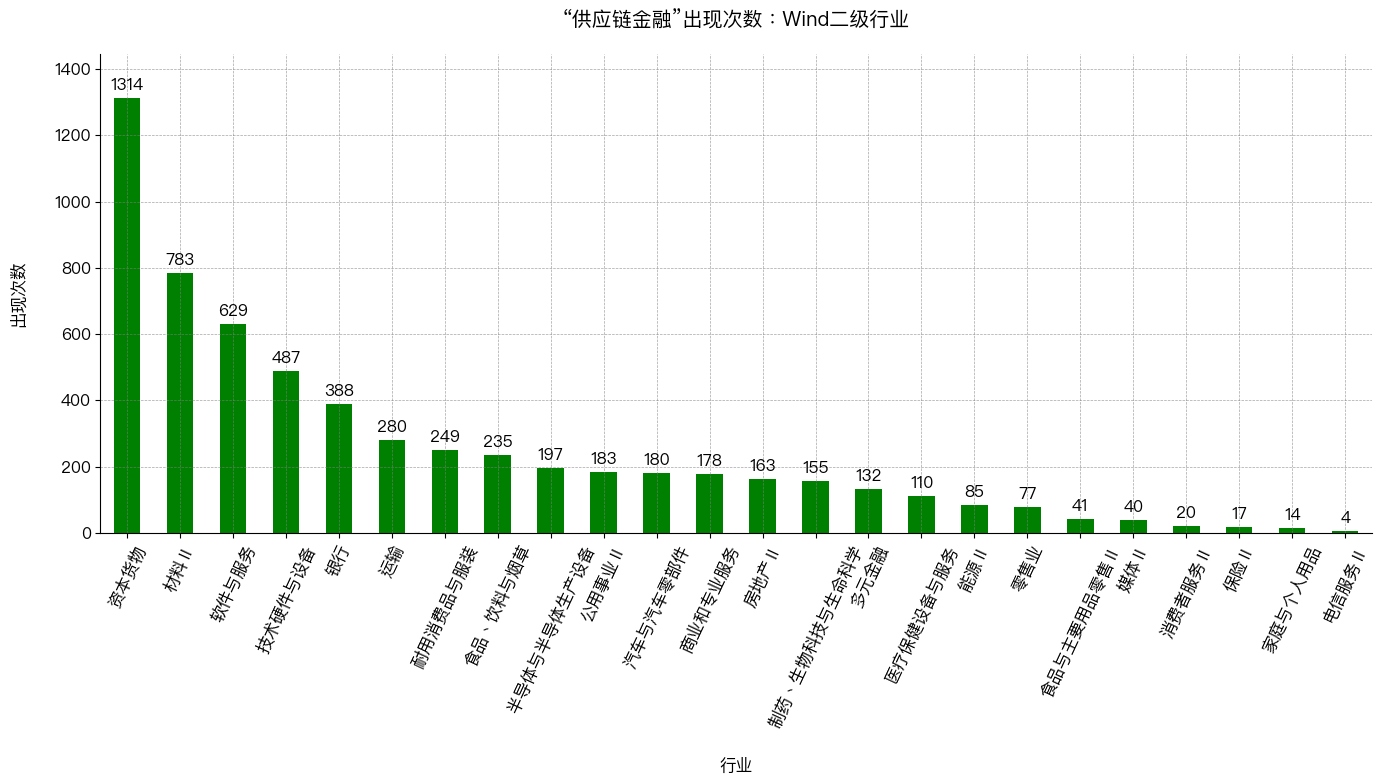

Top 10 Wind一级行业:
Wind一级行业
工业      1772
信息技术    1313
材料       783
可选消费     566
金融       537
日常消费     290
医疗保健     265
公用事业     183
房地产      163
能源        85
Name: count, dtype: int64

Top 10 Wind二级行业:
Wind二级行业
资本货物           1314
材料Ⅱ             783
软件与服务           629
技术硬件与设备         487
银行              388
运输              280
耐用消费品与服装        249
食品、饮料与烟草        235
半导体与半导体生产设备     197
公用事业Ⅱ           183
Name: count, dtype: int64


In [15]:
# 设置matplotlib的中文显示
matplotlib.rcParams['font.sans-serif'] = ['PingFang HK']  
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams['font.size'] = 12  
matplotlib.rcParams['axes.labelweight'] = 'bold'  
matplotlib.rcParams['axes.titleweight'] = 'bold'  
matplotlib.rcParams['savefig.dpi'] = 300

# 算Wind一级行业、 Wind二级行业
all_primary_industries = data['Wind一级行业'].value_counts()
all_secondary_industries = data['Wind二级行业'].value_counts()

# 可视化一级行业
plt.figure(figsize=(14, 8))
barplot1 = all_primary_industries.plot(kind='bar', color='skyblue')
all_primary_industries.plot(kind='bar', color='skyblue')
plt.title('“供应链金融”出现次数：Wind一级行业', pad=20)
plt.xlabel('行业', labelpad=20)
plt.ylabel('出现次数', labelpad=20)
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.9)  
plt.gca().spines['top'].set_visible(False)  
plt.gca().spines['right'].set_visible(False)  
max_height = max(all_primary_industries)  
plt.ylim(0, max_height * 1.1)  
for p in barplot1.patches:
    barplot1.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 9),  
                      textcoords='offset points')
plt.tight_layout()
plt.savefig('PNG/出现次数：Wind一级行业.png') 
plt.show()


# 可视化二级行业
plt.figure(figsize=(14, 8))
barplot2 = all_secondary_industries.plot(kind='bar', color='green')
plt.title('“供应链金融”出现次数：Wind二级行业', pad=20)
plt.xlabel('行业', labelpad=20)
plt.ylabel('出现次数', labelpad=20)
plt.xticks(rotation=65)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7) 
plt.gca().spines['top'].set_visible(False)  
plt.gca().spines['right'].set_visible(False) 
max_height = max(all_secondary_industries) 
plt.ylim(0, max_height * 1.1)  
for p in barplot2.patches:
    barplot2.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 9),  
                      textcoords='offset points')
plt.tight_layout()
plt.savefig('PNG/出现次数：Wind二级行业.png') 
plt.show()

print("Top 10 Wind一级行业:")
print(top_10_primary_industries)
print("\nTop 10 Wind二级行业:")
print(top_10_secondary_industries)


## 3. Visualization: Reliability Check Using Histogram and Boxplot
### 3.1 Outlier handling


In [4]:
np.random.seed(42)
data = pd.DataFrame({
    'Wind一级行业': np.random.choice(['能源', '金融', '科技', '消费品', '工业'], size=100),
    '应收账款周转率': np.random.normal(loc=15, scale=5, size=100),
    '应付账款周转率': np.random.normal(loc=20, scale=7, size=100),
    '存货周转率': np.random.normal(loc=10, scale=3, size=100)
})

# 定义移除异常值的函数
def remove_outliers(df, column):
    lower_bound = df[column].quantile(0.01)  
    upper_bound = df[column].quantile(0.99)  
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), np.nan, df[column])
    return df

# 处理异常值
columns_to_clean = ['应收账款周转率', '应付账款周转率', '存货周转率']
for column in columns_to_clean:
    data = remove_outliers(data, column)

# 删除含有NaN的行
data.dropna(subset=columns_to_clean, inplace=True)


### 3.2 Plot histograms and boxplots

**Since the histograms approximately follow a normal distribution, the data is considered reliable.**


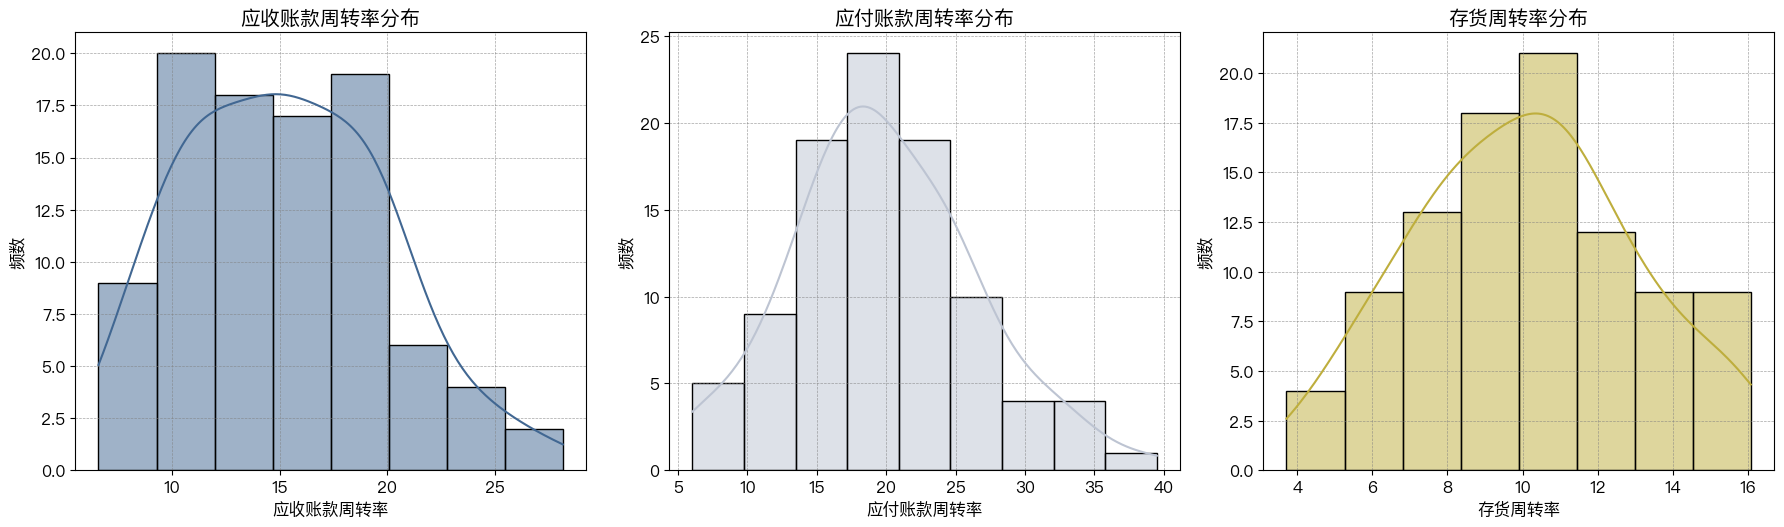

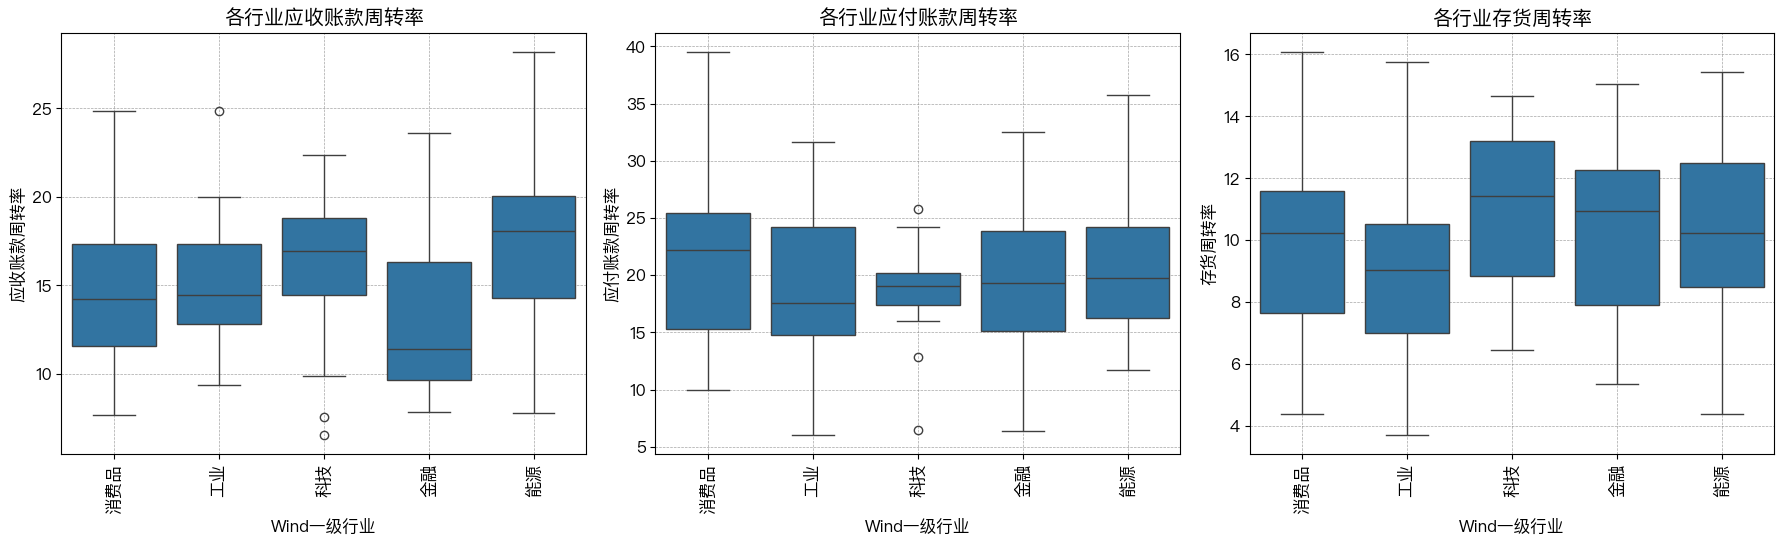

In [5]:
matplotlib.rcParams['font.sans-serif'] = ['PingFang HK']  
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams['font.size'] = 12  
matplotlib.rcParams['axes.labelweight'] = 'bold'  
matplotlib.rcParams['axes.titleweight'] = 'bold'  
matplotlib.rcParams['savefig.dpi'] = 300

# 绘制处理后的直方图
plt.figure(figsize=(18, 10))  
plot_count = 1  
for i, column in enumerate(columns_to_clean):
    plt.subplot(2, 3, plot_count)  
    sns.histplot(data[column], kde=True, color=np.random.rand(3,))
    plt.title(f'{column}分布')
    plt.xlabel(column)
    plt.ylabel('频数')
    plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)  
    plot_count += 1

plt.tight_layout()
#plt.savefig('图片/财务指标分布.png')  
plt.show()

# 绘制箱型图
plt.figure(figsize=(18, 10))
for i, column in enumerate(columns_to_clean):
    plt.subplot(2, 3, plot_count)  
    sns.boxplot(x='Wind一级行业', y=column, data=data)
    plt.title(f'各行业{column}')
    plt.xticks(rotation=90)
    plt.xlabel('Wind一级行业')
    plt.ylabel(column)
    plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7) 
    plot_count += 1

plt.tight_layout()
#plt.savefig('图片/行业财务比较.png')
plt.show()


## 4. Transform Panel Data into Combined Panel & Time-Series Format
**After confirming data reliability, we further process the dataset: integrate each firm’s yearly records and remove duplicate mentions of the same field across announcements.**
### 4.1 Organize by year and merge yearly content


In [6]:
import pandas as pd

# 加载数据
file_path = '数据清理2.1.xlsx'
data = pd.read_excel(file_path, usecols=['股票代码', '当年的年底', 'Wind一级行业', 'Wind二级行业', '关键词统计', '内容1', '内容2', '内容3', '内容4', '内容5'])
print(data.columns)

# 自定义一个函数来合并内容列
def merge_contents(group):
    # 初始化空列表来存储所有内容
    all_contents = []
    for col in ['内容1', '内容2', '内容3', '内容4', '内容5']:
        # 扩展列表，包含当前列的非空内容
        all_contents.extend(group[col].dropna().tolist())
    # 创建新的内容列
    content_data = {f'内容{i+1}': [content] for i, content in enumerate(all_contents)}
    return pd.DataFrame(content_data)

# 合并数据
aggregated_data = data.groupby(['股票代码', '当年的年底', 'Wind一级行业', 'Wind二级行业']).agg({
    '关键词统计': 'sum'
}).reset_index().merge(data.groupby(['股票代码', '当年的年底']).apply(merge_contents).reset_index(), on=['股票代码', '当年的年底'], how='left')

# 保存处理后的数据
aggregated_data.to_excel('数据清理2.2.xlsx', index=False)

Index(['股票代码', '当年的年底', '关键词统计', '内容1', '内容2', '内容3', '内容4', '内容5', 'Wind一级行业',
       'Wind二级行业'],
      dtype='object')


/var/folders/_r/9qn7rq_s5cgfvkcfk_nwn8_c0000gn/T/ipykernel_20594/398122370.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  }).reset_index().merge(data.groupby(['股票代码', '当年的年底']).apply(merge_contents).reset_index(), on=['股票代码', '当年的年底'], how='left')



### 4.2 Remove duplicate entries


In [7]:
file_path = '数据清理2.2.xlsx' 
data = pd.read_excel(file_path) 

# 函数：去除重复内容
def remove_highly_similar_contents(row):
    contents = [row[f'内容{i}'] for i in range(1, 21) if f'内容{i}' in row]
    unique_contents = []
    # 简化版的相似度检测：检查内容是否已存在于unique_contents列表中
    for content in contents:
        if not any(content == existing for existing in unique_contents):
            unique_contents.append(content)
    
    # 填充回原DataFrame对应的列
    for i in range(1, 21):
        if i <= len(unique_contents):
            row[f'内容{i}'] = unique_contents[i-1]
        else:
            row[f'内容{i}'] = None  
    return row

# 应用这个函数到每一行
data = data.apply(remove_highly_similar_contents, axis=1)

# 保存处理后的数据
data.to_excel('数据清理2.3.xlsx', index=False)


### 4.3 Recreate tabular format with pivot tables


In [8]:
import pandas as pd

# 加载数据
file_path = '数据清理2.3.xlsx'
data = pd.read_excel(file_path)

# 提取年份作为新的列
data['年份'] = pd.to_datetime(data['当年的年底']).dt.year

# 创建透视表
pivot_data = data.pivot_table(index=['股票代码', 'Wind一级行业'], 
                              columns='年份', 
                              values='关键词统计', 
                              aggfunc='sum').reset_index()

# 将透视表的列扁平化处理，使其成为单一索引
pivot_data.columns = [f'{level}' if isinstance(level, str) else f'关键词统计_{level}' for level in pivot_data.columns]

# 填充NaN值为0，因为有些年份可能没有数据
pivot_data.fillna(0, inplace=True)

# 转换关键词统计列为整型
year_columns = [col for col in pivot_data.columns if '关键词统计' in col]
for column in year_columns:
    pivot_data[column] = pivot_data[column].astype(int)

# 保存处理后的数据
pivot_data.to_excel('数据清理2.4.xlsx', index=False)


## 5. Keep Only the Top Four Industries
**From the earlier visualization results, for analytical clarity, we retain the top four industries with the highest number of “Supply Chain Finance” mentions. (The fifth industry, Finance, is excluded due to its unique nature).**


In [9]:
# 定义需要保留的行业
industries = ['工业', '信息技术', '材料', '可选消费']

# 筛选数据，只保留四大行业
filtered_data = data[data['Wind一级行业'].isin(industries)]

# 保存处理后的数据
filtered_data.to_excel('数据处理3.0.xlsx', index=False)


## 6. Delete intermediate files


In [10]:
import os
files_to_delete = ['数据清理2.2.xlsx', '数据清理2.3.xlsx','数据清理2.4.xlsx']
for file_name in files_to_delete:
    try:
        os.remove(file_name)
        print(f"文件 {file_name} 已删除。")
    except FileNotFoundError:
        print(f"找不到文件 {file_name}，可能已被删除。")
    except Exception as e:
        print(f"删除文件 {file_name} 时出错：{e}")

文件 数据清理2.2.xlsx 已删除。
文件 数据清理2.3.xlsx 已删除。
文件 数据清理2.4.xlsx 已删除。



## 7. Further Visualization and Analysis
### 7.1 Load cleaned files and process data


In [1]:
import pandas as pd

file1_path = '最终数据_供应链金融.xlsx'
file2_path = '最终数据_四大行业.xlsx'

data1 = pd.read_excel(file1_path)
data2 = pd.read_excel(file2_path)
data1_info = data1.head(), data1.columns
data2_info = data2.head(), data2.columns


# 重命名列以便合并
data2_renamed = data2.rename(columns={"名称": "公司名称"})

# 在'公司名称'上合并数据，使用左合并保留文件1的所有行
merged_data = pd.merge(data1, data2_renamed, on="公司名称", how="left")

# 将周转率列转换为数值类型，非数值项处理为NaN
turnover_columns = [
    '应收账款周转率\n[报告期]2020-12-31', '应收账款周转率\n[报告期]2021-12-31',
    '应收账款周转率\n[报告期]2022-12-31', '应收账款周转率\n[报告期]2023-12-31',
    '应付账款周转率\n[报告期]2020-12-31', '应付账款周转率\n[报告期]2021-12-31',
    '应付账款周转率\n[报告期]2022-12-31', '应付账款周转率\n[报告期]2023-12-31',
    '存货周转率\n[报告期]2020-12-31', '存货周转率\n[报告期]2021-12-31',
    '存货周转率\n[报告期]2022-12-31', '存货周转率\n[报告期]2023-12-31'
]

for column in turnover_columns:
    data2_renamed[column] = pd.to_numeric(data2_renamed[column], errors='coerce')

# 转换后重新计算行业平均值
industry_averages = data2_renamed[turnover_columns].mean()

# 删除不带 '_x' 的原始列
columns_to_remove = [col for col in merged_data.columns if isinstance(col, str) and '\n[报告期]' in col and not col.endswith('_x')]
merged_data = merged_data.drop(columns=columns_to_remove)

# 重命名带 '_x' 后缀的列，删除后缀，确保操作的列名为字符串类型
merged_data.rename(columns=lambda x: x.replace('_x', '') if isinstance(x, str) else x, inplace=True)

# 输出行业平均值和更新后的数据框架列名
print(industry_averages)
print(merged_data.columns)

应收账款周转率\n[报告期]2020-12-31     21.199726
应收账款周转率\n[报告期]2021-12-31     41.872539
应收账款周转率\n[报告期]2022-12-31     77.071968
应收账款周转率\n[报告期]2023-12-31     91.694334
应付账款周转率\n[报告期]2020-12-31     16.487532
应付账款周转率\n[报告期]2021-12-31     17.431871
应付账款周转率\n[报告期]2022-12-31     14.721685
应付账款周转率\n[报告期]2023-12-31     14.567408
存货周转率\n[报告期]2020-12-31       23.398973
存货周转率\n[报告期]2021-12-31       36.218246
存货周转率\n[报告期]2022-12-31      158.843458
存货周转率\n[报告期]2023-12-31      185.600703
dtype: float64
Index([                    '股票代码',                     '公司名称',
                       'Wind一级行业',               '关键词统计_2018',
                     '关键词统计_2021',               '关键词统计_2022',
                     '关键词统计_2023',               '关键词统计_2024',
       '应收账款周转率\n[报告期]2020-12-31', '应收账款周转率\n[报告期]2021-12-31',
       '应收账款周转率\n[报告期]2022-12-31', '应收账款周转率\n[报告期]2023-12-31',
       '应付账款周转率\n[报告期]2020-12-31', '应付账款周转率\n[报告期]2021-12-31',
       '应付账款周转率\n[报告期]2022-12-31', '应付账款周转率\n[报告期]2023-12-31',
         '存货周


### 7.2 Compare firms conducting supply chain finance with their industry averages across three indicators


In [6]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

# 定义要分析的年份
years = ['2021', '2022', '2023']

# 提取参与供应链金融公司在各年度的周转率列名
merged_turnover_columns = [col for col in merged_data.columns if isinstance(col, str) and "周转率" in col]

# 异常值处理：定义每年的异常值标准
def remove_outliers(df, columns):
    for column in columns:
        if column in df.columns:
            series = df[column]
            upper_limit = series.mean() + 3 * series.std()
            lower_limit = series.mean() - 3 * series.std()
            df[column] = series.where((series <= upper_limit) & (series >= lower_limit))
    return df

# 对数据应用异常值处理
for year in years:
    # 应用异常值处理
    merged_data = remove_outliers(merged_data, merged_turnover_columns)

# 计算提到供应链金融的公司在每年的周转率均值
yearly_company_means = {year: merged_data[merged_data[f'关键词统计_{year}'] > 0].filter(regex=r'周转率\n\[报告期\]\d{4}-\d{2}-\d{2}$').mean() for year in years}

# 对比这些公司与行业平均水平进行年度的T检验
yearly_t_tests_results = {
    year: {column: ttest_ind(
        merged_data[merged_data[f'关键词统计_{year}'] > 0][column].dropna(),
        data2_renamed[column].dropna(),
        equal_var=False)  # 假设方差不等
        for column in merged_turnover_columns}
    for year in years}

# 准备显示每年的均值和T检验统计结果
yearly_analysis_results = {
    year: {
        "Company Mean": yearly_company_means[year],
        "Industry Mean": industry_averages,
        "T-Statistic": {k: v.statistic for k, v in yearly_t_tests_results[year].items()},
        "P-Value": {k: v.pvalue for k, v in yearly_t_tests_results[year].items()}
    }
    for year in years
}

# 转换为DataFrame格式以便于可视化
yearly_results_dfs = {year: pd.DataFrame(yearly_analysis_results[year]) for year in years}

# 显示每年的结果
yearly_results_dfs['2021'], yearly_results_dfs['2022'], yearly_results_dfs['2023']

(                          Company Mean  Industry Mean  T-Statistic   P-Value
 应收账款周转率\n[报告期]2020-12-31      6.517416      21.199726    -4.331894  0.000015
 应收账款周转率\n[报告期]2021-12-31      8.892708      41.872539    -2.242081  0.025008
 应收账款周转率\n[报告期]2022-12-31      7.727534      77.071968    -1.574858  0.115365
 应收账款周转率\n[报告期]2023-12-31      6.252166      91.694334    -1.655936  0.097810
 应付账款周转率\n[报告期]2020-12-31      5.614570      16.487532    -1.297572  0.194506
 应付账款周转率\n[报告期]2021-12-31      6.037826      17.431871    -1.315390  0.188451
 应付账款周转率\n[报告期]2022-12-31      6.152590      14.721685    -1.422725  0.154890
 应付账款周转率\n[报告期]2023-12-31      5.611806      14.567408    -1.369809  0.170820
 存货周转率\n[报告期]2020-12-31        6.803770      23.398973    -2.781180  0.005441
 存货周转率\n[报告期]2021-12-31        9.272933      36.218246    -1.415301  0.157055
 存货周转率\n[报告期]2022-12-31        5.344876     158.843458    -1.055975  0.291041
 存货周转率\n[报告期]2023-12-31        5.294987     185.600703    -1.066

Year: 2021, Metric: 应收账款周转率, Industry: 工业, Industry Mean: 6.38, Company Mean: 6.18
Year: 2022, Metric: 应收账款周转率, Industry: 工业, Industry Mean: 5.63, Company Mean: 5.43
Year: 2023, Metric: 应收账款周转率, Industry: 工业, Industry Mean: 5.40, Company Mean: 3.83
Year: 2021, Metric: 应收账款周转率, Industry: 信息技术, Industry Mean: 6.19, Company Mean: 5.39
Year: 2022, Metric: 应收账款周转率, Industry: 信息技术, Industry Mean: 4.76, Company Mean: 4.69
Year: 2023, Metric: 应收账款周转率, Industry: 信息技术, Industry Mean: 4.71, Company Mean: 3.24
Year: 2021, Metric: 应收账款周转率, Industry: 材料, Industry Mean: 45.79, Company Mean: 14.08
Year: 2022, Metric: 应收账款周转率, Industry: 材料, Industry Mean: 54.07, Company Mean: 10.92
Year: 2023, Metric: 应收账款周转率, Industry: 材料, Industry Mean: 55.56, Company Mean: 8.09
Year: 2021, Metric: 应收账款周转率, Industry: 可选消费, Industry Mean: 26.91, Company Mean: 8.71
Year: 2022, Metric: 应收账款周转率, Industry: 可选消费, Industry Mean: 17.06, Company Mean: 9.27
Year: 2023, Metric: 应收账款周转率, Industry: 可选消费, Industry Mean: 15.39, Com

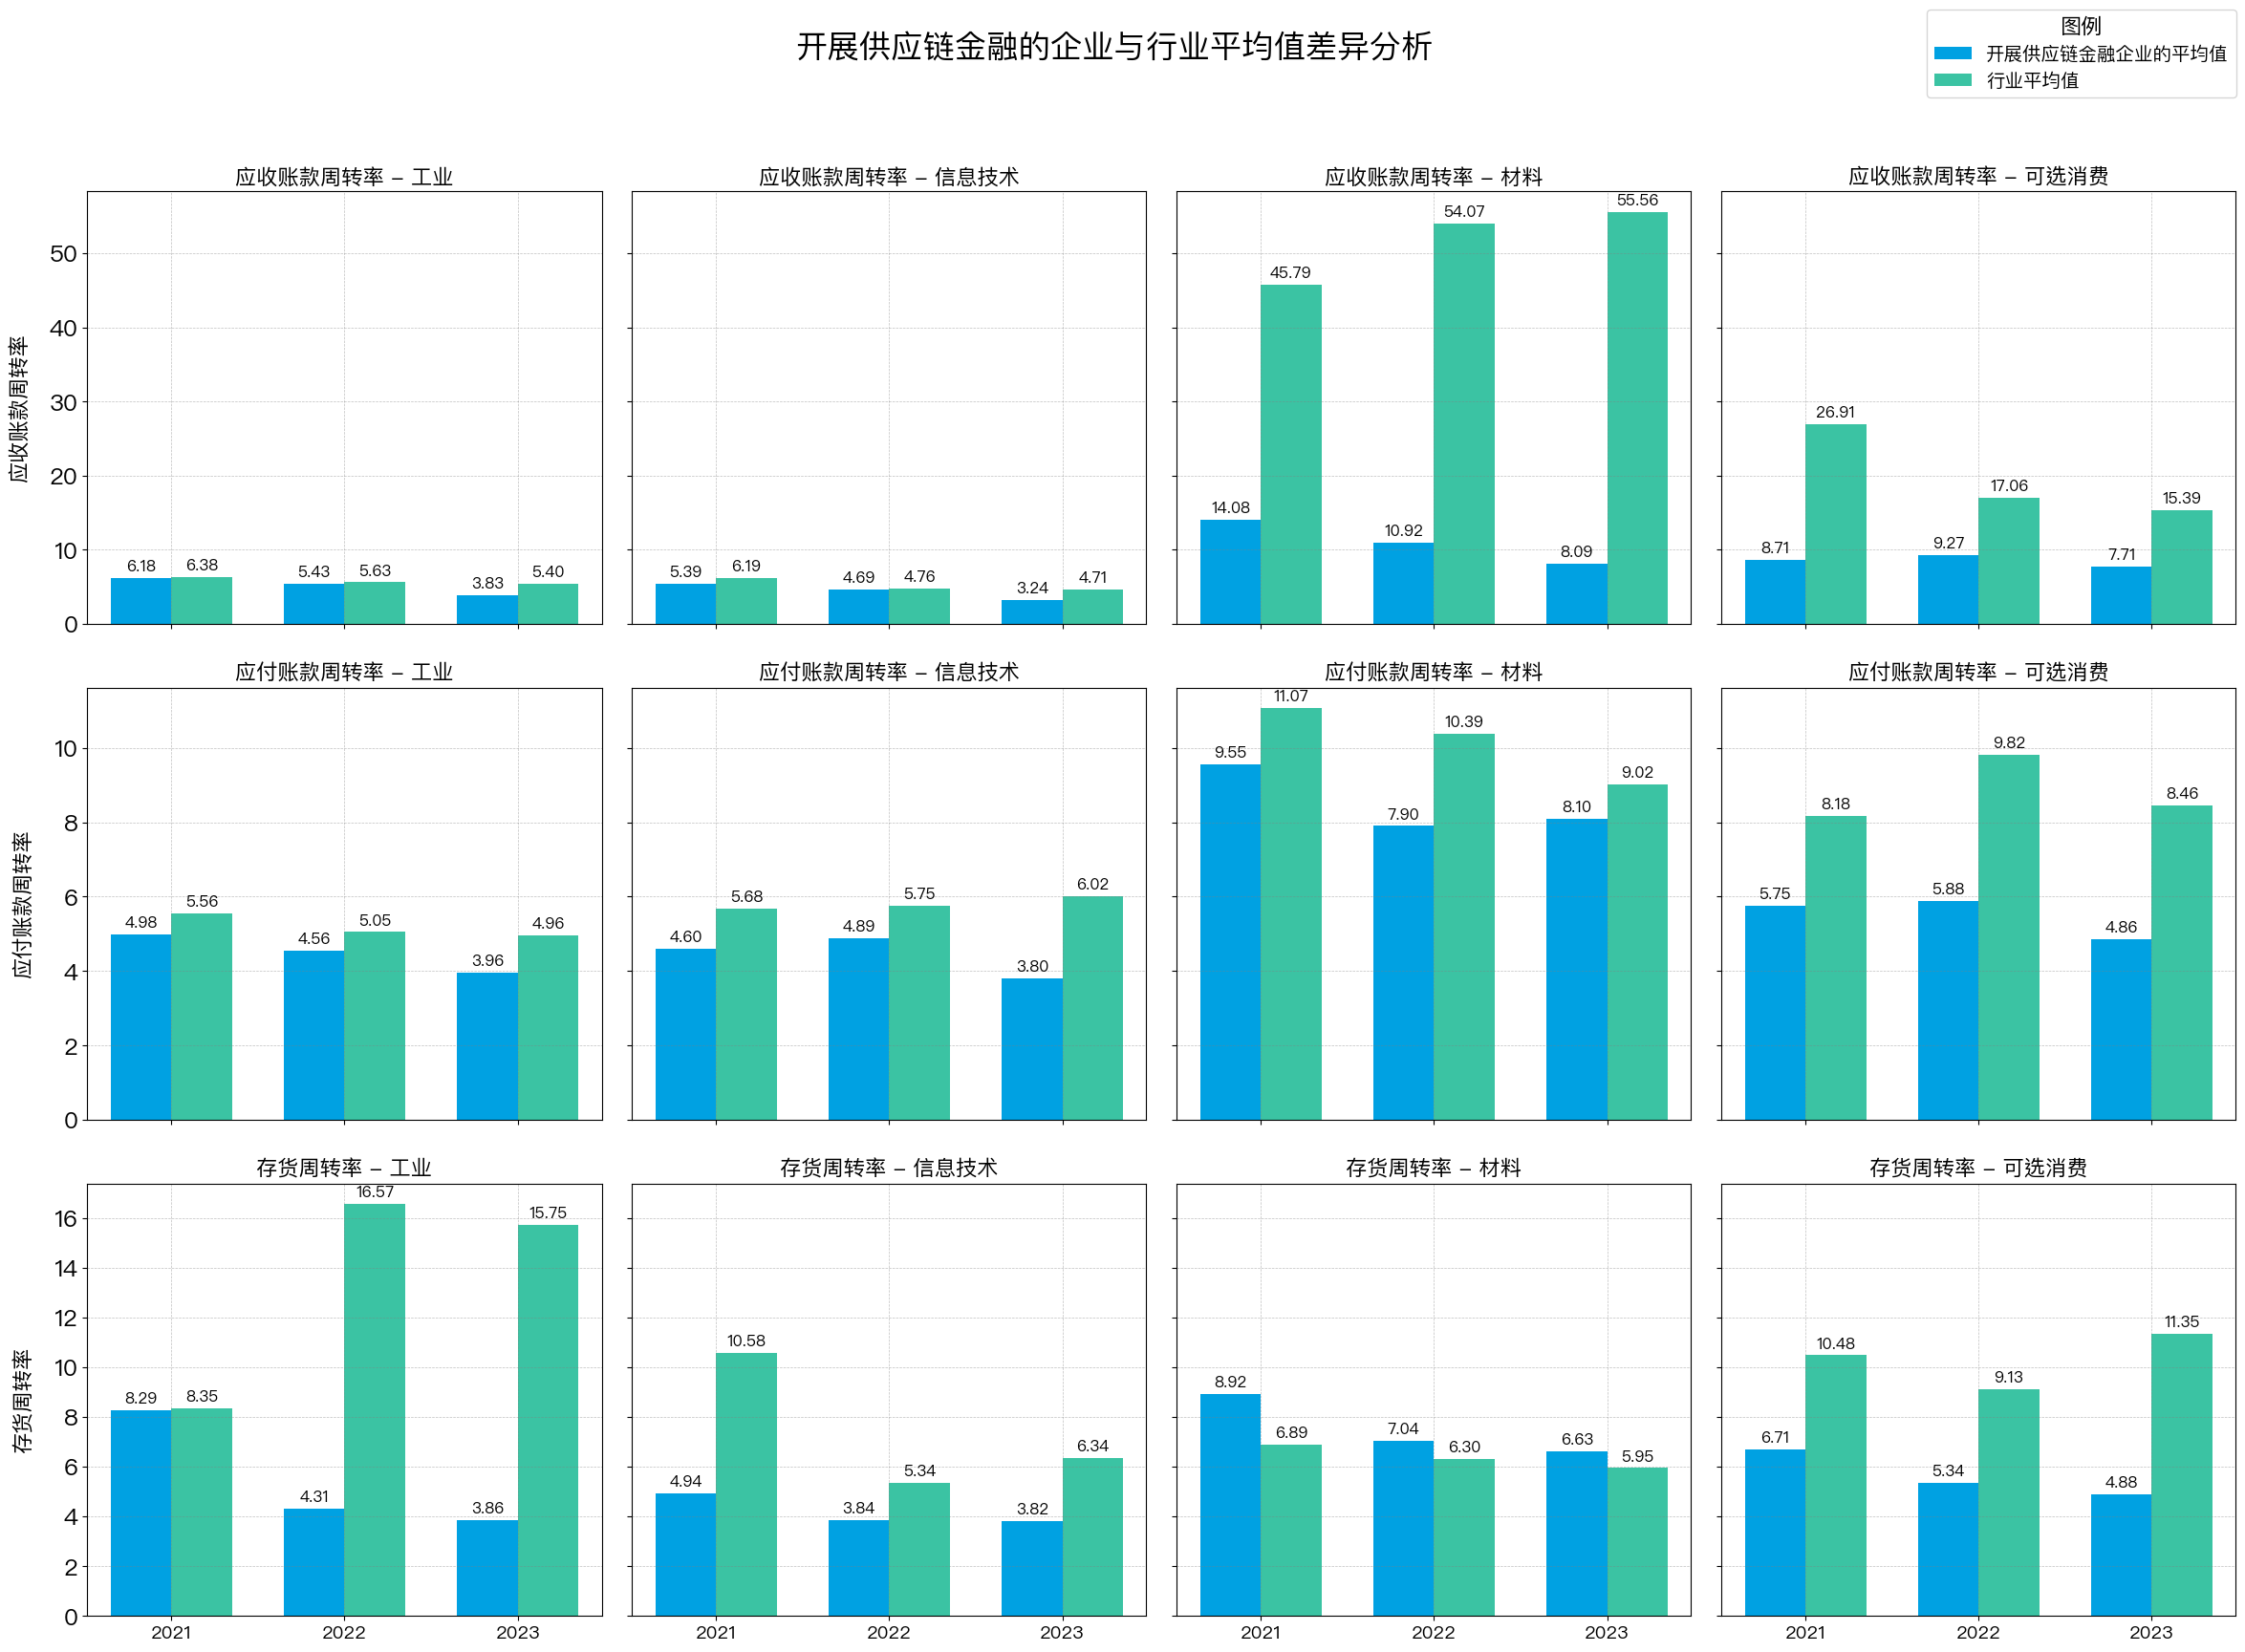

In [7]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
import pandas as pd

# 设置matplotlib参数
matplotlib.rcParams['font.sans-serif'] = ['PingFang HK']  # 使用PingFang HK字体支持中文显示
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams['font.size'] = 18  # 调整字体大小
matplotlib.rcParams['axes.labelweight'] = 'bold'
matplotlib.rcParams['axes.titleweight'] = 'bold'
matplotlib.rcParams['savefig.dpi'] = 800

# 行业和指标的列表
industries = ['工业', '信息技术', '材料', '可选消费']
metrics = ['应收账款周转率', '应付账款周转率', '存货周转率']
years = ['2021', '2022', '2023']

# 异常值处理函数
def remove_outliers(series):
    upper_limit = series.mean() + 3 * series.std()
    lower_limit = series.mean() - 3 * series.std()
    return series.where((series <= upper_limit) & (series >= lower_limit))

# 创建图表
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(24, 18), sharex=True, sharey='row')
fig.suptitle('开展供应链金融的企业与行业平均值差异分析', fontsize=24, fontweight='bold')
colors = ['#00A1E2','#3BC3A3']

for i, metric in enumerate(metrics):
    for j, industry in enumerate(industries):
        ax = axes[i, j]
        x = np.arange(len(years))  # the label locations
        width = 0.35  # the width of the bars

        industry_means = []
        company_means = []

        for year in years:
            # 筛选特定行业和年份的数据
            industry_data = data2_renamed[data2_renamed['Wind一级行业'] == industry]
            company_data = merged_data[(merged_data['Wind一级行业'] == industry) & (merged_data[f'关键词统计_{year}'] > 0)]

            # 应用异常值处理
            industry_metric = remove_outliers(industry_data[f'{metric}\n[报告期]{year}-12-31'])
            company_metric = remove_outliers(company_data[f'{metric}\n[报告期]{year}-12-31'])

            # 计算处理后的行业平均值和企业平均值
            industry_mean = industry_metric.mean()
            company_mean = company_metric.mean()

            industry_means.append(industry_mean)
            company_means.append(company_mean)

            # 输出均值结果
            print(f"Year: {year}, Metric: {metric}, Industry: {industry}, Industry Mean: {industry_mean:.2f}, Company Mean: {company_mean:.2f}")

        # 绘制条形图
        rects1 = ax.bar(x - width/2, company_means, width, label='开展供应链金融企业的平均值', alpha=1, color=colors[0])
        rects2 = ax.bar(x + width/2, industry_means, width, label='行业平均值', alpha=1, color=colors[1])

        # 添加均值标签
        for rect, mean in zip(rects1, company_means):
            height = rect.get_height()
            ax.annotate(f'{mean:.2f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=12)
        
        for rect, mean in zip(rects2, industry_means):
            height = rect.get_height()
            ax.annotate(f'{mean:.2f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=12)

        ax.set_title(f'{metric} - {industry}', fontsize=16)
        ax.set_xticks(x)
        ax.set_xticklabels(years, fontsize=14)
        ax.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)  # 添加网格线

        # 只在最左侧添加y轴标签
        if j == 0:
            ax.set_ylabel(metric, fontsize=16, labelpad=15)

# 在图表的最右上角放置全局图例
if j == 3:
    # 创建全局图例
    fig.legend([rects1, rects2], [rects1.get_label(), rects2.get_label()], loc='upper left', fontsize=14, title='图例', title_fontsize='16', bbox_to_anchor=(0.85, 1))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# 确保保存路径存在
if not os.path.exists('图片'):
    os.makedirs('图片')
# 保存图表
#plt.savefig('图片/供应链金融企业与行业平均值差异分析.png')
plt.show()


### 7.3 Analyze which secondary industries show the strongest effects of supply chain finance
#### Identify the peak year for supply chain finance mentions
- First, count annual mentions across all secondary industries to determine the peak year.  
- Compare changes in key indicators between the peak year and the previous year to assess the impact of supply chain finance.  
- Visualize the differences.

In [8]:
# 统计每年在所有二级行业中提及供应链金融的频次
years = ['2021', '2022', '2023']
industry_mentions = {year: 0 for year in years}
for year in years:
    # 计算每个年份的提及次数
    mentions_in_year = merged_data[merged_data[f'关键词统计_{year}'] > 0]['Wind二级行业'].count()
    industry_mentions[year] = mentions_in_year

# 找出提及最多的年份
max_mentions_year = max(industry_mentions, key=industry_mentions.get)
max_mentions_count = industry_mentions[max_mentions_year]

print(f"开展最猛烈的年份是：{max_mentions_year}，总提及次数为：{max_mentions_count}")

开展最猛烈的年份是：2023，总提及次数为：540


Year: 2023, Industry: 材料Ⅱ, Metric: 应收账款周转率, Change: 2.88
Year: 2023, Industry: 资本货物, Metric: 应收账款周转率, Change: 1.89
Year: 2023, Industry: 耐用消费品与服装, Metric: 应收账款周转率, Change: 1.52
Year: 2023, Industry: 运输, Metric: 应收账款周转率, Change: 4.40
Year: 2023, Industry: 零售业, Metric: 应收账款周转率, Change: 1.53
Year: 2023, Industry: 软件与服务, Metric: 应收账款周转率, Change: 1.57
Year: 2023, Industry: 技术硬件与设备, Metric: 应收账款周转率, Change: 1.58
Year: 2023, Industry: 汽车与汽车零部件, Metric: 应收账款周转率, Change: 4.71
Year: 2023, Industry: 半导体与半导体生产设备, Metric: 应收账款周转率, Change: 2.51
Year: 2023, Industry: 商业和专业服务, Metric: 应收账款周转率, Change: 0.03
Year: 2023, Industry: 媒体Ⅱ, Metric: 应收账款周转率, Change: 0.97
Year: 2023, Industry: 消费者服务Ⅱ, Metric: 应收账款周转率, Change: 2.05


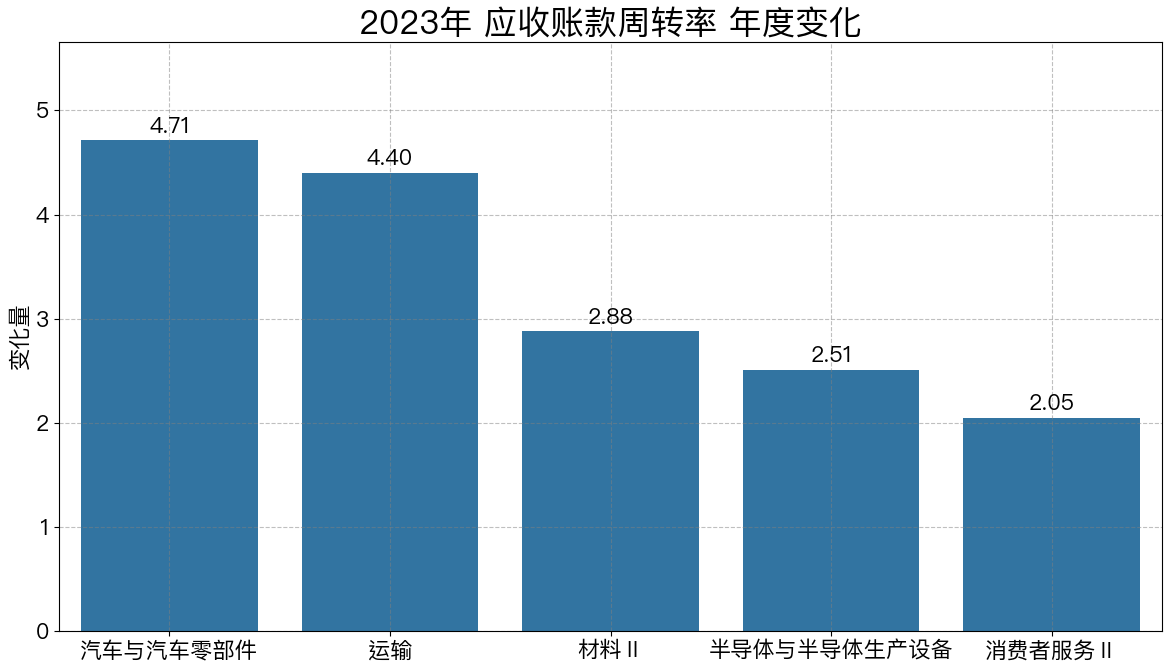

Year: 2023, Industry: 材料Ⅱ, Metric: 应付账款周转率, Change: 0.08
Year: 2023, Industry: 资本货物, Metric: 应付账款周转率, Change: 0.52
Year: 2023, Industry: 耐用消费品与服装, Metric: 应付账款周转率, Change: 2.37
Year: 2023, Industry: 运输, Metric: 应付账款周转率, Change: 1.80
Year: 2023, Industry: 零售业, Metric: 应付账款周转率, Change: 0.15
Year: 2023, Industry: 软件与服务, Metric: 应付账款周转率, Change: 1.07
Year: 2023, Industry: 技术硬件与设备, Metric: 应付账款周转率, Change: 0.35
Year: 2023, Industry: 汽车与汽车零部件, Metric: 应付账款周转率, Change: 0.20
Year: 2023, Industry: 半导体与半导体生产设备, Metric: 应付账款周转率, Change: 2.95
Year: 2023, Industry: 商业和专业服务, Metric: 应付账款周转率, Change: 1.01
Year: 2023, Industry: 媒体Ⅱ, Metric: 应付账款周转率, Change: 2.25
Year: 2023, Industry: 消费者服务Ⅱ, Metric: 应付账款周转率, Change: 0.74


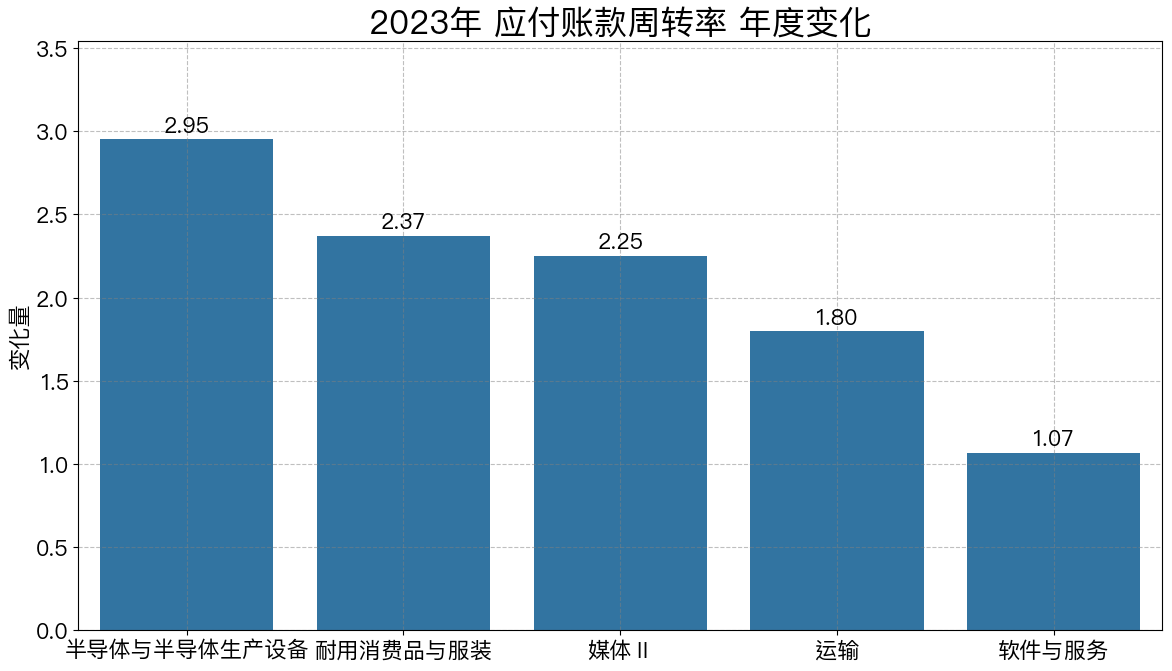

Year: 2023, Industry: 材料Ⅱ, Metric: 存货周转率, Change: 0.26
Year: 2023, Industry: 资本货物, Metric: 存货周转率, Change: 0.09
Year: 2023, Industry: 耐用消费品与服装, Metric: 存货周转率, Change: 0.60
Year: 2023, Industry: 运输, Metric: 存货周转率, Change: 1.53
Year: 2023, Industry: 零售业, Metric: 存货周转率, Change: 0.30
Year: 2023, Industry: 软件与服务, Metric: 存货周转率, Change: 0.12
Year: 2023, Industry: 技术硬件与设备, Metric: 存货周转率, Change: 0.02
Year: 2023, Industry: 汽车与汽车零部件, Metric: 存货周转率, Change: 0.24
Year: 2023, Industry: 半导体与半导体生产设备, Metric: 存货周转率, Change: 0.14
Year: 2023, Industry: 商业和专业服务, Metric: 存货周转率, Change: 0.39
Year: 2023, Industry: 媒体Ⅱ, Metric: 存货周转率, Change: 0.40
Year: 2023, Industry: 消费者服务Ⅱ, Metric: 存货周转率, Change: 12.83


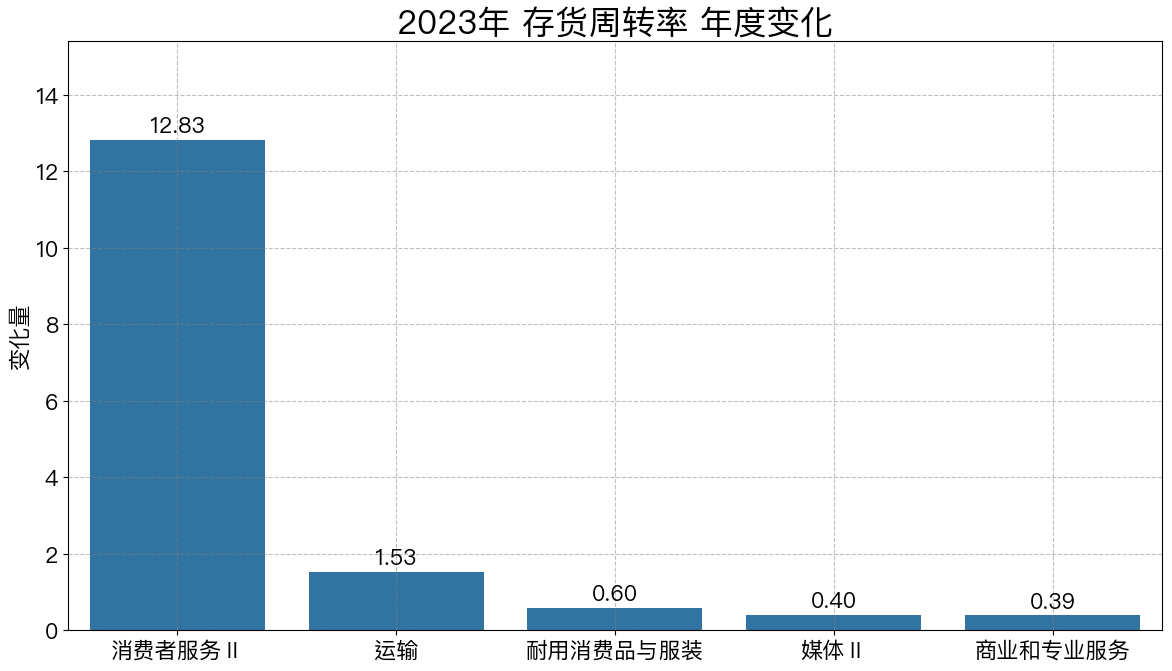

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

# 设置matplotlib参数
plt.rcParams['font.sans-serif'] = ['PingFang HK']  # 使用PingFang HK字体支持中文显示
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 16  # 调整字体大小
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['savefig.dpi'] = 800

# 统计每年在各个二级行业中提及供应链金融的频次
years = ['2021', '2022', '2023']
industry_mentions = {year: {} for year in years}
for year in years:
    year_data = merged_data[merged_data[f'关键词统计_{year}'] > 0]
    for industry in year_data['Wind二级行业'].unique():
        industry_mentions[year][industry] = year_data[year_data['Wind二级行业'] == industry].shape[0]

# 准备保存路径
save_path = '图片'
if not os.path.exists(save_path):
    os.makedirs(save_path)

# 对比关键年份与其他年份在经济指标上的表现差异，分别保存图表
metrics = ['应收账款周转率', '应付账款周转率', '存货周转率']
for metric in metrics:
    diffs = {}
    for industry in industry_mentions[max_mentions_year]:
        current_year_avg = merged_data[(merged_data['Wind二级行业'] == industry) & (merged_data[f'关键词统计_{max_mentions_year}'] > 0)][f'{metric}\n[报告期]{max_mentions_year}-12-31'].mean()
        prev_year_avg = merged_data[(merged_data['Wind二级行业'] == industry) & (merged_data[f'关键词统计_{str(int(max_mentions_year)-1)}'] > 0)][f'{metric}\n[报告期]{str(int(max_mentions_year)-1)}-12-31'].mean()
        if pd.notna(current_year_avg) and pd.notna(prev_year_avg):
            change = abs(current_year_avg - prev_year_avg)
            if industry not in diffs or change > diffs[industry]:
                diffs[industry] = change
                print(f'Year: {year}, Industry: {industry}, Metric: {metric}, Change: {change:.2f}')


    # 仅保留变化最显著的前5个行业
    top_industries = sorted(diffs, key=diffs.get, reverse=True)[:5]

    fig, ax = plt.subplots(figsize=(12, 7))
    industry_diffs = [diffs[industry] for industry in top_industries]
    bar_plot = sns.barplot(x=top_industries, y=industry_diffs, ax=ax)
    ax.set_title(f'{max_mentions_year}年 {metric} 年度变化', fontsize=24, fontweight='bold')  # 添加年度到标题
    ax.set_xlabel('')  # 移除x轴标题
    ax.set_ylabel('变化量')
    ax.grid(True, linestyle='--', color='grey', alpha=0.5)  # 添加淡色虚线网格
    ax.tick_params(axis='x', rotation=0)  # 旋转X轴标签以避免重合

    max_height = max(industry_diffs)  # 找到最高条的高度
    ax.set_ylim(0, max_height * 1.2)  # 设置Y轴的最大值为最高条的1.2倍
    
    # 添加均值标签
    for p in bar_plot.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10),
                    textcoords="offset points",
                    )
                                                        
    plt.tight_layout()
    #plt.savefig(f'{save_path}/{metric}_年度变化.png')
    plt.show()